In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('finished_processed.csv')
print(dataset.keys())
dataset.drop(['backers_count', 'usd_pledged', 'disable communications'], axis=1, inplace=True)
target = dataset['state']
features = dataset.drop(['state', 'is_starrable'], axis=1)

#from sklearn.preprocessing import LabelEncoder
#lb = LabelEncoder()
#features = features.apply(lb.fit_transform)

Index(['backers_count', 'category', 'country', 'creator', 'currency',
       'disable_communication', 'goal', 'is_starrable', 'staff_pick', 'state',
       'usd_pledged', 'location', 'blurb_length', 'duration'],
      dtype='object')


In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)
print(X_train.shape)

(130367, 10)


In [4]:
rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [5]:
predicted = rf.predict(X_test)
print(accuracy_score(y_test, predicted))
print(1 - rf.oob_score_)
importances = [(features.keys()[i], rf.feature_importances_[i]) for i in range(len(features.keys()))]
print(importances)

0.770434462445
0.238058711177
[('category', 0.24548041520136288), ('country', 0.013882342246852735), ('creator', 0.15627644978765728), ('currency', 0.01296496671811179), ('disable_communication', 0.0026745095567225602), ('goal', 0.17970094190764604), ('staff_pick', 0.074617880786267993), ('location', 0.13862843322844171), ('blurb_length', 0.094689460387663724), ('duration', 0.081084600179273311)]


In [6]:
droppable = ['disable_communication']
features.drop(droppable, inplace=True, axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
print(accuracy_score(y_test, predicted))
print(1 - rf.oob_score_)
importances = [(features.keys()[i], rf.feature_importances_[i]) for i in range(len(features.keys()))]
print(importances)

0.771078792342
0.237590801353
[('category', 0.24829047323000908), ('country', 0.014141371887226655), ('creator', 0.15671834565293541), ('currency', 0.012779945388289032), ('goal', 0.17979579977436405), ('staff_pick', 0.074970443950096902), ('location', 0.13955950262498942), ('blurb_length', 0.094272346447065003), ('duration', 0.079471771045024536)]


In [8]:
%%capture --no-stdout
from collections import OrderedDict

min_est = 10
max_est = 100

max_features = [0.2, 0.33, 0.5, 0.8, "sqrt", "log2", None]

error_scores = OrderedDict((l, []) for l in max_features)

for mf in max_features:
    
    rf_test = RandomForestClassifier(n_estimators = min_est, max_features = mf, oob_score = True, random_state = 1,
                                     warm_start = True, n_jobs = -1)
    for i in range(min_est, max_est + 1, 5):
        rf_test.set_params(n_estimators = i)
        rf_test.fit(X_train, y_train)
        oob_error = 1 - rf_test.oob_score_
        error_scores[mf].append((i, oob_error))
        print(str(mf) + ": " + str(i) + ", " + str(oob_error))

0.2: 10, 0.33202420858
0.2: 15, 0.317150812706
0.2: 20, 0.303711828914
0.2: 25, 0.297260809868
0.2: 30, 0.291653562635
0.2: 35, 0.288746385205
0.2: 40, 0.284535196791
0.2: 45, 0.281121756273
0.2: 50, 0.277976788604
0.2: 55, 0.273988049123
0.2: 60, 0.273128936004
0.2: 65, 0.270812398843
0.2: 70, 0.269531399817
0.2: 75, 0.269493046553
0.2: 80, 0.268894735631
0.2: 85, 0.268933088895
0.2: 90, 0.267483335507
0.2: 95, 0.266777635445
0.2: 100, 0.264998043984
0.33: 10, 0.320894091296
0.33: 15, 0.301027100417
0.33: 20, 0.291231676728
0.33: 25, 0.282717252065
0.33: 30, 0.275376437289
0.33: 35, 0.271426051071
0.33: 40, 0.26986123789
0.33: 45, 0.265588684253
0.33: 50, 0.264177284129
0.33: 55, 0.262083195901
0.33: 60, 0.261208741476
0.33: 65, 0.259237383694
0.33: 70, 0.258132809683
0.33: 75, 0.25712795416
0.33: 80, 0.256798116088
0.33: 85, 0.255655188813
0.33: 90, 0.254811417
0.33: 95, 0.253829573435
0.33: 100, 0.253146885331
0.5: 10, 0.279434212646
0.5: 15, 0.262190585041
0.5: 20, 0.254473908274
0

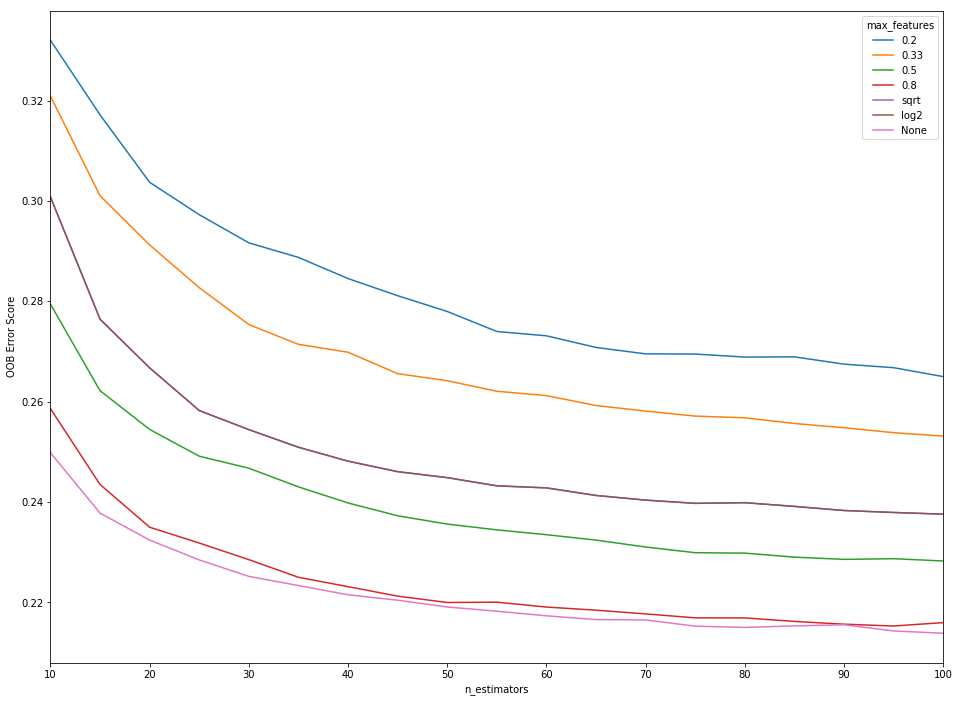

In [9]:
plt.figure(figsize=(16,12))
for mf, rf_err in error_scores.items():
    xs, ys = zip(*rf_err)
    plt.plot(xs, ys, label=str(mf))
plt.xlim(min_est, max_est)
plt.xlabel("n_estimators")
plt.ylabel("OOB Error Score")
plt.legend(title="max_features", loc="upper right")
plt.show();

In [25]:
rf_optimized = RandomForestClassifier(n_estimators = 100, max_features = None, oob_score = True, random_state = 1,
                                      min_samples_leaf=20, n_jobs = -1)
rf_optimized.fit(X_train, y_train)
predicted = rf_optimized.predict(X_test)
print(accuracy_score(y_test, predicted))
print(1 - rf_optimized.oob_score_)
importances = [(features.keys()[i], rf_optimized.feature_importances_[i]) for i in range(len(features.keys()))]
print(importances)

0.794780927835
0.205941687697
[('category', 0.48168967888190556), ('country', 0.012196613597660704), ('creator', 0.043628676292431744), ('currency', 0.016319003830878757), ('goal', 0.20457303152657833), ('staff_pick', 0.13040653262997429), ('location', 0.043806360667492467), ('blurb_length', 0.025700799557635882), ('duration', 0.041679303015442232)]


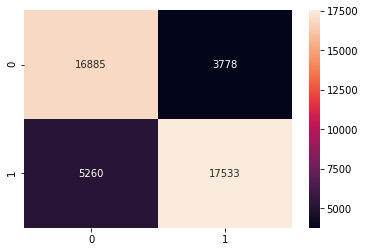

In [22]:
from sklearn.metrics import confusion_matrix

cfmtx = confusion_matrix(y_test, predicted)
sns.heatmap(cfmtx, annot=True, fmt='g')

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rf = RandomForestClassifier(n_estimators=100)
param_dist = {"max_depth": [3, None],
              "max_features": [0.8, "sqrt", None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True],
              "criterion": ["gini", "entropy"]}
rsearch = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': [0.8, 'sqrt', None], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018383779748>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018383779E10>, 'bootstrap': [True], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scorin

AttributeError: 'RandomForestClassifier' object has no attribute 'alpha'

In [38]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(rsearch.cv_results_)
print(rsearch.best_score_)
print(rsearch.best_estimator_)

Model with rank: 1
Mean validation score: 0.7927 (std: 0.0014)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.7927 (std: 0.0018)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.7926 (std: 0.0013)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 6}

0.792746630666
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, 